# IT Trends in India

<img src='https://opensource.com/sites/default/files/lead-images/metrics_data_dashboard_system_computer_analytics.png'></img>

## Introduction

An insightful data analysis of Most Popular & In-Demand Programming Languages and Cloud Platforms in India in 2021.

In this Data Analysis process, we are going to work with StackOverflow’s Annual Developers Survey data done for the year 2021, to understand the current and future Information Technology Trends in India, and will try to provide Insights for In-Demand Programming Languages and Cloud Platforms in the country.

With nearly 80,000 responses fielded from over 180 countries and dependent territories, the StackOverflow’s Annual Developer Survey examines all aspects of the developer’s experience from career satisfaction and job search to education and opinions on open source software

**There were 100’s of questions as a part of the survey, we'll be analyzing the survey data to get the answers to the following question:** </br>
</br>
***“What are the most Commonly used Programming Languages in India?”*** </br>
***“Which Cloud Platforms are most desired by Indian Programmers to work with ?”*** </br>
***“Most popular new gen Miscellaneous Techs among Indian Programmers ?”*** </br>
***“How Developers should deal with complex dev issues if stucked with ?”*** </br>

#### A data analysis using Stackoverflow’s 2021 Annual Developer Survey

In [183]:
# to handle datasets
import numpy as np
import pandas as pd
import os
os.getcwd()
import sys
%run FuncLib.ipynb
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="white")

## Section 1 : Business Understanding 

In this Data Analysis process, we are going to analyze 2021 StackOverflow Annual Developer Survey Data to understand the current and future Information Technology Trends in India, and will try to provide Insights for In-Demand Programming Languages and Cloud Platforms in the country.

##### We will cover and try to answer the below 3 questions:- 

###### Question 1. What are the most Commonly used Programming Languages in India?
###### Question 2. Cloud Platforms most desired by Indian Programmers to work with ?
###### Question 3. Most popular new gen Miscellaneous Techs among Indian Programmers ?
###### Question 4. How Developers should deal with complex dev issues if stucked with ?

</br>

## Section 2 : Data Understanding
In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [82]:
# Read StackOverflow Annual Developers Surveys data 2021
df_2021 = pd.read_csv('./survey_results_public_2021.csv')

In [83]:
df_2021.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

## Section 3 : Data Preparation
Clean
Converting the data types into suitable types.Since date cannot be str type.so we convert it top datetime type

Droping columns
We drop all the columns which we do not need for any manupulations i.e from which data we cannot make out any thing.

#### Generating WordCloud for the unique values

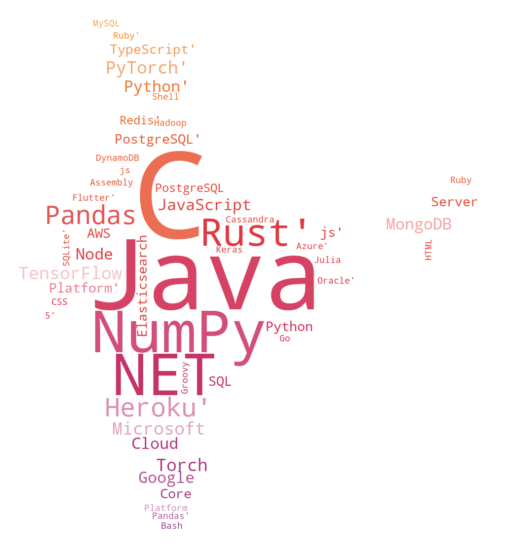

In [84]:
# Figure 1: Generating WordCloud with India map outline shape using StackOverflow Annual Dev Survey Data 2021
wCloudText = df_2021[['LanguageWantToWorkWith','LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'MiscTechHaveWorkedWith']].dropna().values

mask = np.array(Image.open('IndiaOutline.png'))
mask_colors = ImageColorGenerator(mask)

wc = WordCloud(width=1080, height=720, stopwords=STOPWORDS, mask=mask, background_color="white", color_func=mask_colors)
wc.generate(str(wCloudText))

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)

plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [85]:
# Filter the dataframe by Column Name - Country and Column Value - India (Country column value) and Select the required Columns
# to understand Most Commonly Used & Most Desired Programming Languages & Cloud Platforms by Indian Programmers in 2021

ProgLangsIndia_2021 = filter_dataframe(df_2021, 'Country', 'India', ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

PlatformIndia2021 = filter_dataframe(df_2021, 'Country', 'India', ['PlatformHaveWorkedWith', 'PlatformWantToWorkWith'])

In [86]:
# Splitting the Data Frame by column into a Series.
wanted_lang_2021 = split_column(ProgLangsIndia_2021, 'LanguageWantToWorkWith', ';')

wanted_platforms_2021 = split_column(PlatformIndia2021, 'PlatformWantToWorkWith', ';')

In [87]:
# Flatting nested list objects.
list_wanted_languages_2021 = disarray(wanted_lang_2021)

list_wanted_platforms_2021 = disarray(wanted_platforms_2021)

In [88]:
# Groping a list and creating a dict.
dict_wanted_languages_2021 = group_list_PLang(list_wanted_languages_2021, '2021')

dict_wanted_platforms_2021 = group_list_Plat(list_wanted_platforms_2021, '2021')

In [ ]:
# Creating a Data Frame appending the data.
ProgLangs2021 = pd.DataFrame.from_dict(dict_wanted_languages_2021)

CloudPlats2021 = pd.DataFrame.from_dict(dict_wanted_platforms_2021)

In [130]:
top_ProgLangs = ProgLangs2021.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()
Top10WantedProgLands_chart = ProgLangs2021[ProgLangs2021['Programming Language'].isin(top_ProgLangs)].sort_values(by=['Percentage'], ascending=False)
Top10WantedProgLands_chart


,Programming Language,Count,Year,Percentage
1,JavaScript,5220,2021,11.248788
4,Python,5191,2021,11.186295
9,Node.js,3855,2021,8.307294
0,HTML/CSS,3629,2021,7.820278
8,SQL,3185,2021,6.863485
12,TypeScript,3126,2021,6.736343
2,Java,3058,2021,6.589807
7,Go,2235,2021,4.816291
15,C++,2077,2021,4.475811
3,Kotlin,1669,2021,3.596595


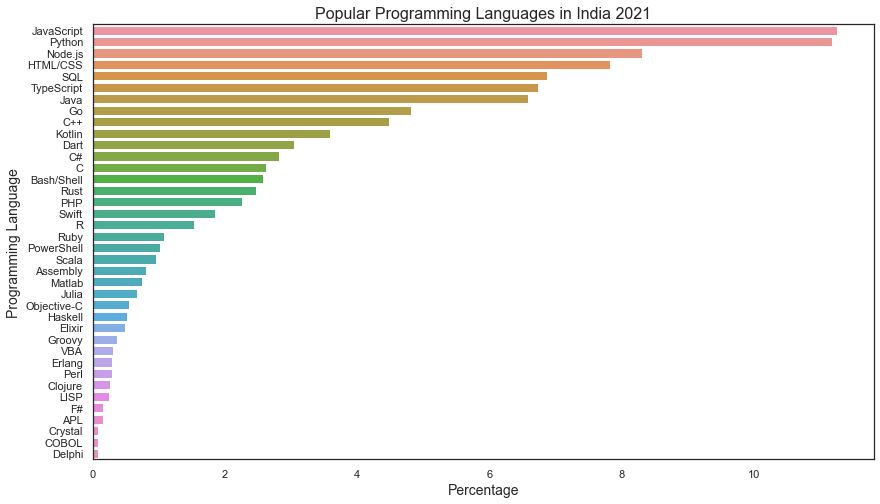

In [137]:
# Figure 2: Complete list of Programming Languages in India 2021 with descending popularity percentage
plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            data = ProgLangs2021.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Language", fontsize = 14)
plt.title('Popular Programming Languages in India 2021', size = 16)
plt.show()

In [138]:
top_CloudPlats = CloudPlats2021.sort_values(by=['Percentage'], ascending=False).head(10)['Cloud Platforms'].unique()
Top10WantedCloudPlats_chart = CloudPlats2021[CloudPlats2021['Cloud Platforms'].isin(top_CloudPlats)].sort_values(by=['Percentage'], ascending=False)
Top10WantedCloudPlats_chart

,Cloud Platforms,Count,Year,Percentage
0,AWS,4203,2021,30.877167
2,Google Cloud Platform,2996,2021,22.009991
5,Microsoft Azure,2459,2021,18.064943
3,Heroku,1622,2021,11.915957
1,DigitalOcean,1411,2021,10.365854
4,IBM Cloud or Watson,541,2021,3.974434
6,Oracle Cloud Infrastructure,380,2021,2.791654


We can observe the Technical Languages ***'Javascript & Python'*** among the top choice to work for Indian Programmers with ***AWS*** among the most wanted ***Cloud Platform*** skillset in India.

## Section 4 : Modeling

We can see that classic languages like: **Java Script**, **SQL**, **Java** are still popular as per Stack Overflow Survey Datafor years 2020 and 2021

## Part — 1. What are the most Commonly used programming languages in India?

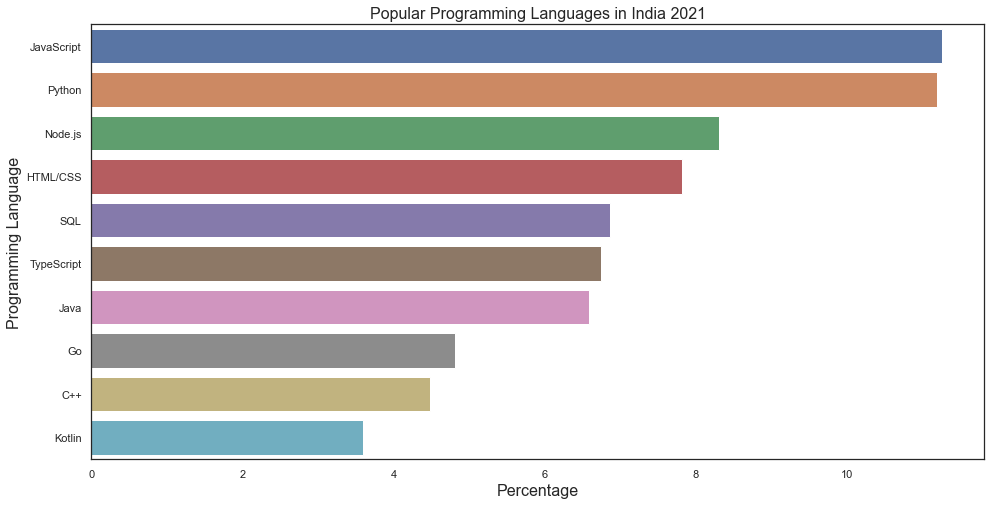

In [239]:
# Figure 3: Top 10 Programming Languages in India 2021 with descending popularity
plt.figure(figsize=(16,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            data = Top10WantedProgLands_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 16)
plt.ylabel("Programming Language", fontsize = 16)
plt.title('Popular Programming Languages in India 2021', size = 16)
plt.show()

We can see that popularity for ***Python*** has been growing tremendously close to other languages, probably due to its versatility and extensive use in data related areas. This could also be possibly due to increase in demand for Data Science, Artificial Intelligence and Machine Learning technologies in India.

There’s also an increase in popularity of ***NodeJS***, as being an open-source, cross-platform, back-end JavaScript runtime environment while JavaScript still dominates.

We can see the classic languages like: **Java & SQL** are still developer's favourites but there’s decline in their popularity. This may be result of increasing popularity for AI & Data Science in the country. May be Indian Programmers are now considering ***the Functional Paradigm to be better over the Object Oriented.*** </br>

## Part — 2. Cloud Platforms most desired by Indian Programmers to work with ?

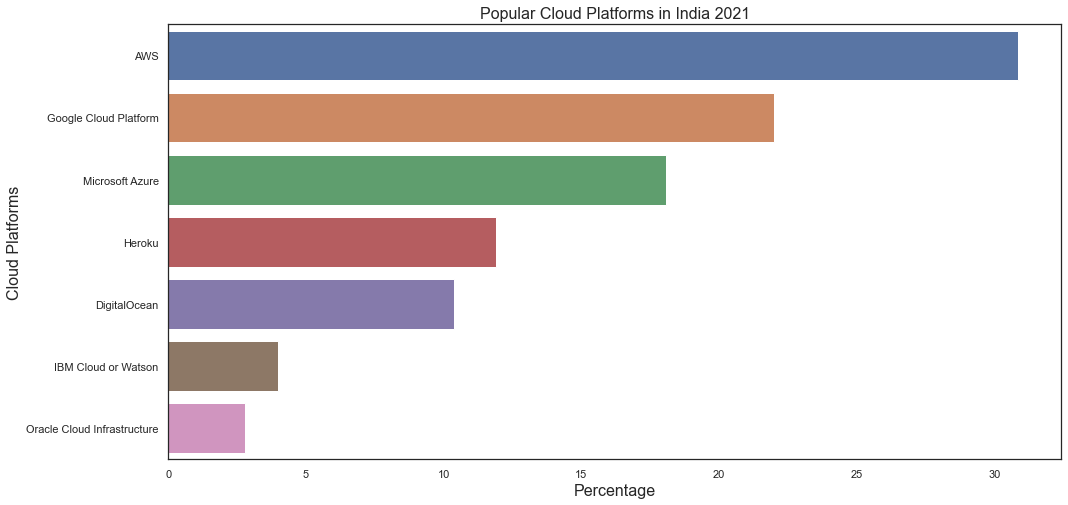

In [240]:
# Figure 4: Top 10 Cloud Platforms in 2021 with descending popularity percentage among Indian Programmers
plt.figure(figsize=(16,8))
sns.barplot(x = 'Percentage', 
            y = 'Cloud Platforms',
            data = CloudPlats2021.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 16)
plt.ylabel("Cloud Platforms", fontsize = 16)
plt.title('Popular Cloud Platforms in India 2021', size = 16)
plt.show()

We can clearly see the dominancy of the ***Amazon Web Services (AWS)*** over any of the other popular Cloud Platforms in India. More than 30% of the Indian Programmers are using and are willing to learn and work on this popular Cloud Technology followed by ***Google Cloud*** and ***Microsoft Azure***.

One can clearly observe the increasing popularity for the top 4 Cloud Platforms in India as per above figure namely ***AWS, Google Cloud, Microsoft Azure and Heroku — one of the first Cloud Platforms.***

From the above data analysis, ***DigitalOcean*** can also be seen gaining sudden popularity in India by 2021 and may hold the future with the performance it is delivering at such competitive prices, compared to other cloud providers.

## Part — 3. Most popular new gen Miscellaneous Techs among Indian Programmers ?



In [229]:
# Lets compare the popularity of Miscellaneous Techs among India and Rest of the World

miscTechWorld = df_2021[['Country', 'Employment', 'MiscTechWantToWorkWith']]
miscTechIndia = miscTechWorld[miscTechWorld.Country == "India"]

miscTechWorld = miscTechWorld.dropna(axis=0)
miscTechIndia = miscTechIndia.dropna(axis=0)

miscTechWorld['MiscTechWantToWorkWith'] = miscTechWorld['MiscTechWantToWorkWith'].fillna('missing')
miscTechWorld.head()
miscTechWorld.count()

miscTechIndia['MiscTechWantToWorkWith'] = miscTechIndia['MiscTechWantToWorkWith'].fillna('missing')
miscTechIndia.head()
miscTechIndia.count()

# Following the same procedures and functions again of Data Preparation
# Split the list into words in the column JobSat
split_miscTechWorld = split_column(miscTechWorld, 'MiscTechWantToWorkWith', ';')
split_miscTechIndia = split_column(miscTechIndia, 'MiscTechWantToWorkWith', ';')

# Flatting nested list objects. aka putting into a [] list
list_miscTechWorld = disarray(split_miscTechWorld)
list_miscTechIndia = disarray(split_miscTechIndia)

# The list has repeating values, lets get a list of unique values
np.unique(list_miscTechWorld)
np.unique(list_miscTechIndia)

# Put list into Dictionary
dict_miscTechIndia = group_list_MiscTech(list_miscTechIndia, 'India')
dict_miscTechWorld = group_list_MiscTech(list_miscTechWorld, 'World')

## Convert Dictionary to DataFrame sorted with 'Count' values for appropriate comparison of DataSets
df1 = pd.DataFrame(dict_miscTechIndia).sort_values(by=['Count'], ascending=False)
df2 = pd.DataFrame(dict_miscTechWorld).sort_values(by=['Count'], ascending=False)

miscTechDF = pd.concat([df1,df2])

miscTechDF['Percentage'] = percentage(miscTechDF, 'Region')

# Get the top 10 Misc Techs
top_10_miscTech = miscTechDF.sort_values(by=['Percentage'], ascending=False).head(10)['MiscTechWantToWorkWith'].unique()

miscTechDF_chart = miscTechDF[miscTechDF['MiscTechWantToWorkWith'].isin(top_10_miscTech)]

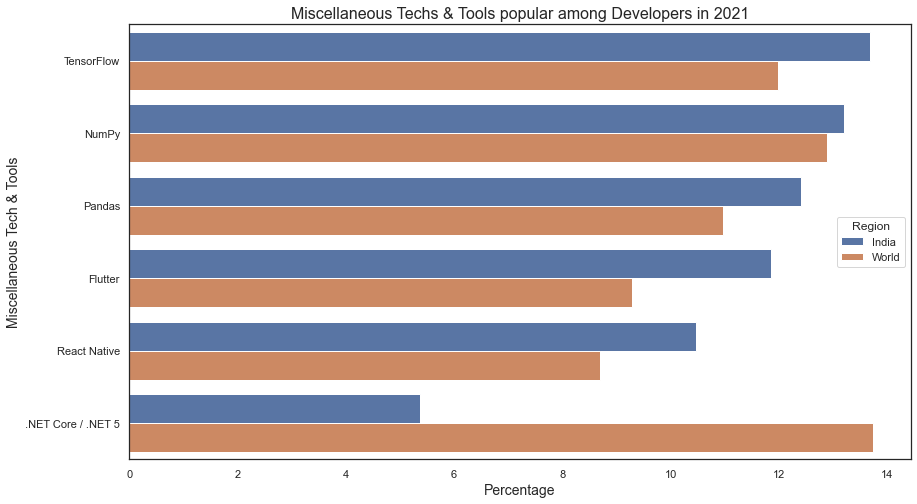

In [226]:
# Figure 5 — Comparison popular Misc Tech tools among Indian Programmers & Rest of the World, in ref to Popularity % in India
plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'MiscTechWantToWorkWith',
            hue = 'Region',
            data = miscTechDF_chart)

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Miscellaneous Tech & Tools", fontsize = 14)
plt.title('Miscellaneous Techs & Tools popular among Developers in 2021', size = 16)
plt.show()

We can observe the impact of advancement in AI and Data Science in India as the most popular techn is ***TensorFlow***, which is free and open-source software library for Machine Learning and Artificial Intelligence, followed by ***Pandas and Numpy*** which are software libraries written for the ***Python*** programming language.

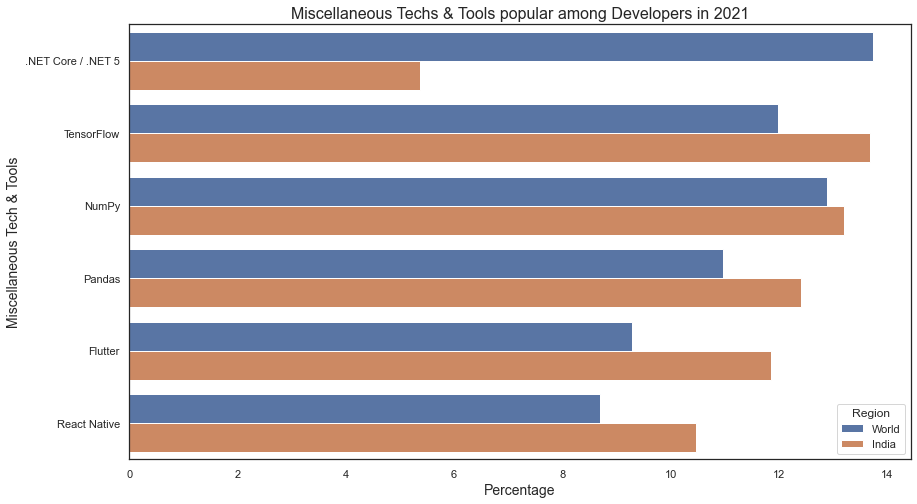

In [227]:
# Figure 6 — Comparison popular Misc Tech tools among Programmers in the World & India, in ref to Popularity % in Rest of World
plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'MiscTechWantToWorkWith',
            hue = 'Region',
            data = miscTechDF_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Miscellaneous Tech & Tools", fontsize = 14)
plt.title('Miscellaneous Techs & Tools popular among Developers in 2021', size = 16)
plt.show()

The Rest of the World and India isn't 100% in sync in terms of Advanced tools and techs popularity as the Microsoft's technologies Frameworks ***.Net Core and .Net 5*** are still popular and wanted among the World market than India's data alone, followed by advanced tools for AI and Data Science like **TensorFlow, Pandas and Numpy**.

## Part — 4. How Developers should deal with complex dev issues if stucked with ?


In [237]:
# Issue Resolution steps taken by Full-Time Employed Programmers across the world
resolSteps = df_2021[['NEWStuck', 'Employment', 'LanguageHaveWorkedWith']]
resolSteps = resolSteps[resolSteps.Employment == "Employed full-time"]
resolSteps = resolSteps.dropna(axis=0)
resolSteps['NEWStuck'] = resolSteps['NEWStuck'].fillna('missing')
resolSteps.head()    
resolSteps.count()

# Following the same procedures and functions again
# Split -> Flatting into [] list -> put list into Dictionary -> Convert it to a DataFrame
split_ResolSteps = split_column(resolSteps, 'NEWStuck', ';')
list_ResolSteps = disarray(split_ResolSteps)
np.unique(list_ResolSteps)
dict_ResolSteps = group_list_NEWStuck(list_ResolSteps, '2021')
NEWStuckDF = pd.DataFrame.from_dict(dict_ResolSteps)

NEWStuckDF['Percentage'] = percentage(NEWStuckDF, 'Year')

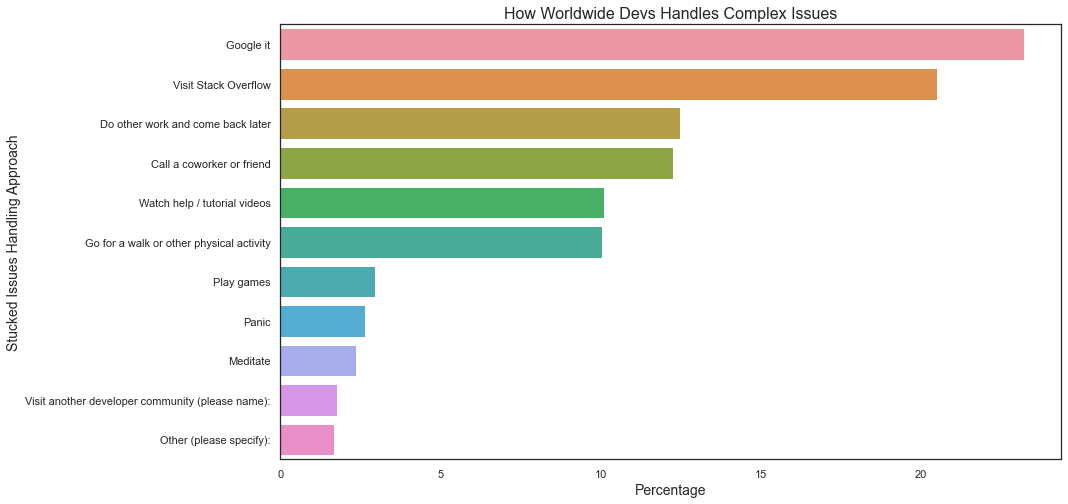

In [241]:
# Figure 7 — Top Issue Resolution steps taken by Full-Time Employed Programmers across the world
plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Stucked Issues Dealing',
            data = NEWStuckDF.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Stucked Issues Handling Approach", fontsize = 14)
plt.title('How Worldwide Devs Handles Complex Issues', size = 16)
plt.show()

From the above analysis, we can conclude the most common resolution step to be ***Google the Issue and Visit the Stack Overflow*** to find appropriate resolution for the issue to which you got stuck followed by taking a small break from the issue and try to focus back on it after few hours. Keep learning and skilling up your knowledge from this amazing Stack Exchange Network developed for professional and enthusiast programmers.  

## Section 5 : Evaluation

With the above figures, we can have two insights:

1. As is evidenced by the data representations and outputs, people who already work with a programming language have a strong probability of wanting to learn the advanced tools and libraries associated to or designed for the same programming language. As most popular programming language among programmers is ***Python** and the most popular misc tech are the **Libraries designed for Python** ***.i.e., 'Pandas' & 'Numpy'***. </br>
</br>
2. People who work with a programming language of a specific area, tend to want to learn programming languages of the same area. For example: **HTML** is strongly correlated with **CSS** and **JavaScript**.

## Section 6 : Conclusion

In this article, we took an insight at what are the most popular and most used/In-demand Programming Languages and Cloud Platforms among Indian Programmers, by analyzing the StackOverflow’s Annual Developer Survey data for the year 2021.

1. We can see significant rise in popularity of ***Python*** by 2021 and can say that ***“Python is the programming language of the moment”.*** </br>
 </br>
2. The other emerging technology is ***NodeJS*** with significant rise by 2021. </br>
 </br>
3. We have seen that ***JavaScript*** is still dominating the Indian programmers primary technology. </br>
 </br>
4. The older Programming Languages like *SQL and Java* has seen a significant decline, with the advent of new areas in India such as Artificial Intelligence and Data Science. </br>
 </br>
5. ***Amazon Web Services (AWS)*** is dominating the India’s Cloud Computing and is Programmers 1st choice with usability share of more than 35%. </br>
 </br>
 
To see more about this analysis, see the link to my medium post available [here](https://medium.com/@vyas.prateek23/information-technology-trends-in-india-66498a829f25).
 </br>

 ## Section 7 : References

***Stackoverflow Developer Survey Data:*** https://insights.stackoverflow.com/survey </br>
 </br>
 ***Medium Blogpost:*** https://medium.com/@vyas.prateek23/information-technology-trends-in-india-66498a829f25 </br>
 </br>
***Github:*** https://github.com/vyasprateek/DataScience_NanoDegree_BlogPost </br>